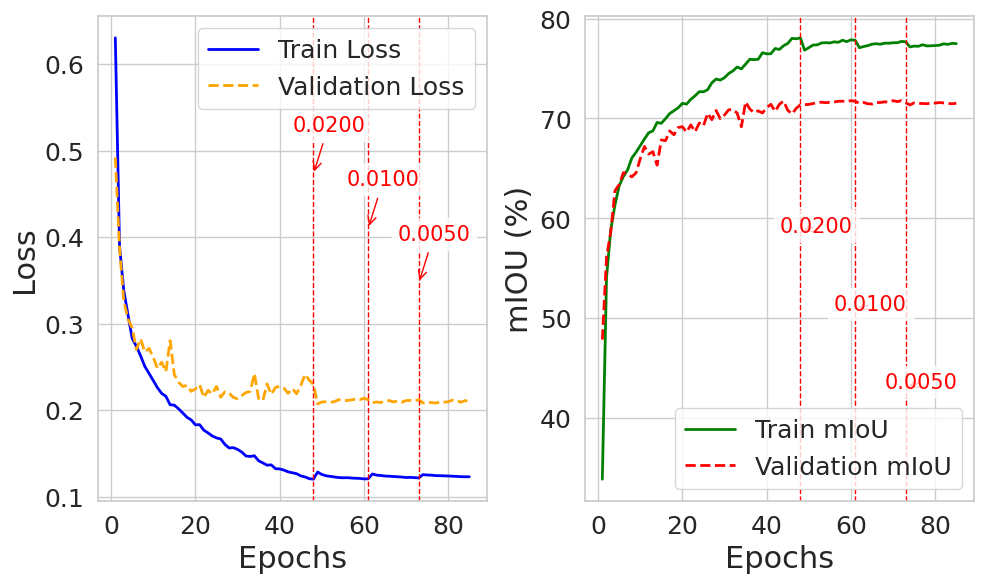

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

csv_file = 'Segformer_lr_dynamic_batch_2_standard_scale_[1.0, 1.1]_colour_0.25_blur_0.03_convup_weightedloss_wd_1e-7_losses.csv'
data = pd.read_csv(csv_file)

sns.set(style="whitegrid")

log_file = 'Segformer_lr_dynamic_batch_2_standard_scale_[1.0, 1.1]_colour_0.25_blur_0.03_convup_weightedloss_wd_1e-7training_output.log'

optim_switch_epochs = []
lr_values = []
with open(log_file, 'r') as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if 'Switched to SGD optimiser' in line:
            lr_match = re.search(r'learning rate: ([0-9.]+)', line)
            if lr_match:
                lr = lr_match.group(1)
                lr_values.append(lr)
            for j in range(i, -1, -1):
                match = re.search(r'Epoch (\d+)/\d+', lines[j])
                if match:
                    epoch = int(match.group(1))
                    optim_switch_epochs.append(epoch)
                    break

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

axes[0].plot(data['Epoch'], data['Train Loss'], label='Train Loss', color='blue', linewidth=2)
axes[0].plot(data['Epoch'], data['Val Loss'], label='Validation Loss', color='orange', linestyle='--', linewidth=2)
axes[0].set_xlabel('Epochs', fontsize=22)
axes[0].set_ylabel('Loss', fontsize=22)
axes[0].legend(loc='upper right', fontsize=18)
axes[0].tick_params(axis='both', labelsize=18)
axes[0].grid(True)

for idx, epoch in enumerate(optim_switch_epochs):
    height_factor = 0.75 - (idx * 0.1) % 0.3
    annotation_y = max(data['Train Loss'].max(), data['Val Loss'].max()) * height_factor
    arrow_y = annotation_y + 0.05
    axes[0].axvline(x=epoch, color='red', linestyle='--', linewidth=1)
    axes[0].annotate(f'{lr_values[idx]}',
                     xy=(epoch, annotation_y),
                     xytext=(epoch - 5, arrow_y),
                     textcoords='data', color='red', fontsize=15,
                     bbox=dict(facecolor='white', alpha=0.8),
                     arrowprops=dict(arrowstyle="->", color='red'))

axes[1].plot(data['Epoch'], data['Train mIoU (%)'], label='Train mIoU', color='green', linewidth=2)
axes[1].plot(data['Epoch'], data['Val mIoU (%)'], label='Validation mIoU', color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Epochs', fontsize=22)
axes[1].set_ylabel('mIOU (%)', fontsize=22)
axes[1].legend(loc='lower right', fontsize=18)
axes[1].tick_params(axis='both', labelsize=18)
axes[1].grid(True)

for idx, epoch in enumerate(optim_switch_epochs):
    height_factor = 0.75 - (idx * 0.1) % 0.3
    annotation_y = max(data['Train mIoU (%)'].max(), data['Val mIoU (%)'].max()) * height_factor
    arrow_y = annotation_y + 0.05
    axes[1].axvline(x=epoch, color='red', linestyle='--', linewidth=1)
    axes[1].annotate(f'{lr_values[idx]}',
                     xy=(epoch, annotation_y),
                     xytext=(epoch - 5, arrow_y),
                     textcoords='data', color='red', fontsize=15,
                     bbox=dict(facecolor='white', alpha=0.8),
                     arrowprops=dict(arrowstyle="->", color='red'))

plt.tight_layout()

plt.savefig('losses_and_miou_plot.png', dpi=326)

plt.show()